<a href="https://www.kaggle.com/code/chinmayameher/eda-on-iris-species-dataset?scriptVersionId=215692205" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction to Iris Dataset Analysis

The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

* Id
* SepalLengthCm
* SepalWidthCm
* PetalLengthCm
* PetalWidthCm
* Species

The objective of this notebook is to provide a comprehensive understanding of the Iris dataset and demonstrate various exploratoratory data analysis and visualization techniques.

![](https://miro.medium.com/v2/resize:fit:900/1*dol7Xh_c_Zc0C3LhBQ2uyg.jpeg)

In [1]:
#Import Liabraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import warnings
warnings.filterwarnings('ignore')

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


# Dataset Description

In [2]:
# Load the Iris dataset
iris_data = pd.read_csv('/kaggle/input/iris/Iris.csv')

In [3]:
print(iris_data.shape)

(150, 6)


In [4]:
print(iris_data.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [5]:
print("Dataset Information:")
iris_data.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


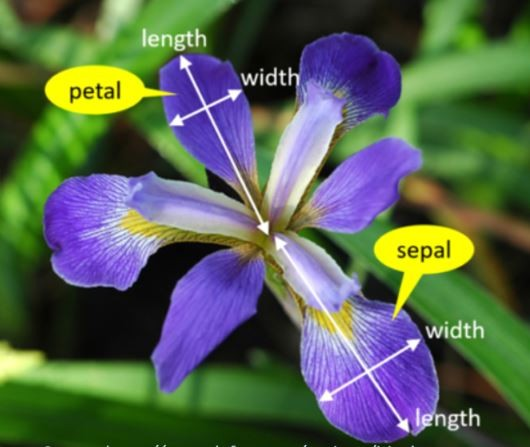

In [6]:
# Display dataset preview
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
# Display Statistical Iformation
print("\nStatistical Information:")
print(iris_data.describe())


Statistical Information:
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [8]:
#Count the number of observation in each species
iris_data["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

### Observation

* Total 150 number of records
* The dataset is a balanced dataset as the number of setosa, versicolor and virginica is equal
* No null values in the dataset.
* mean speal length is 5.8cm, mean sepal width is 3.0 cm, mean petal length is 3.8 cm, mean petal length is 1.2 cm.


#  Data Visualization

## Scatter Plot

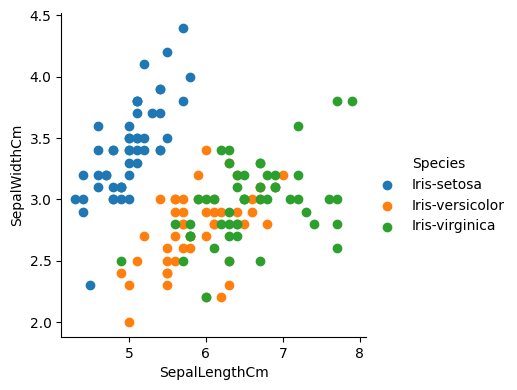

In [9]:
#Scatter plot of different species
sns.FacetGrid(iris_data, hue ='Species', height = 4).map(plt.scatter,"SepalLengthCm","SepalWidthCm").add_legend()
plt.show()

### Observation(s):

1. Using SepalLengthCm and SepalWidthCm features, we can distinguish Setosa flowers from other species.
2. Seperating Versicolor from Viginica is much harder as the data points are overlapping on each other.

## Pair Plot

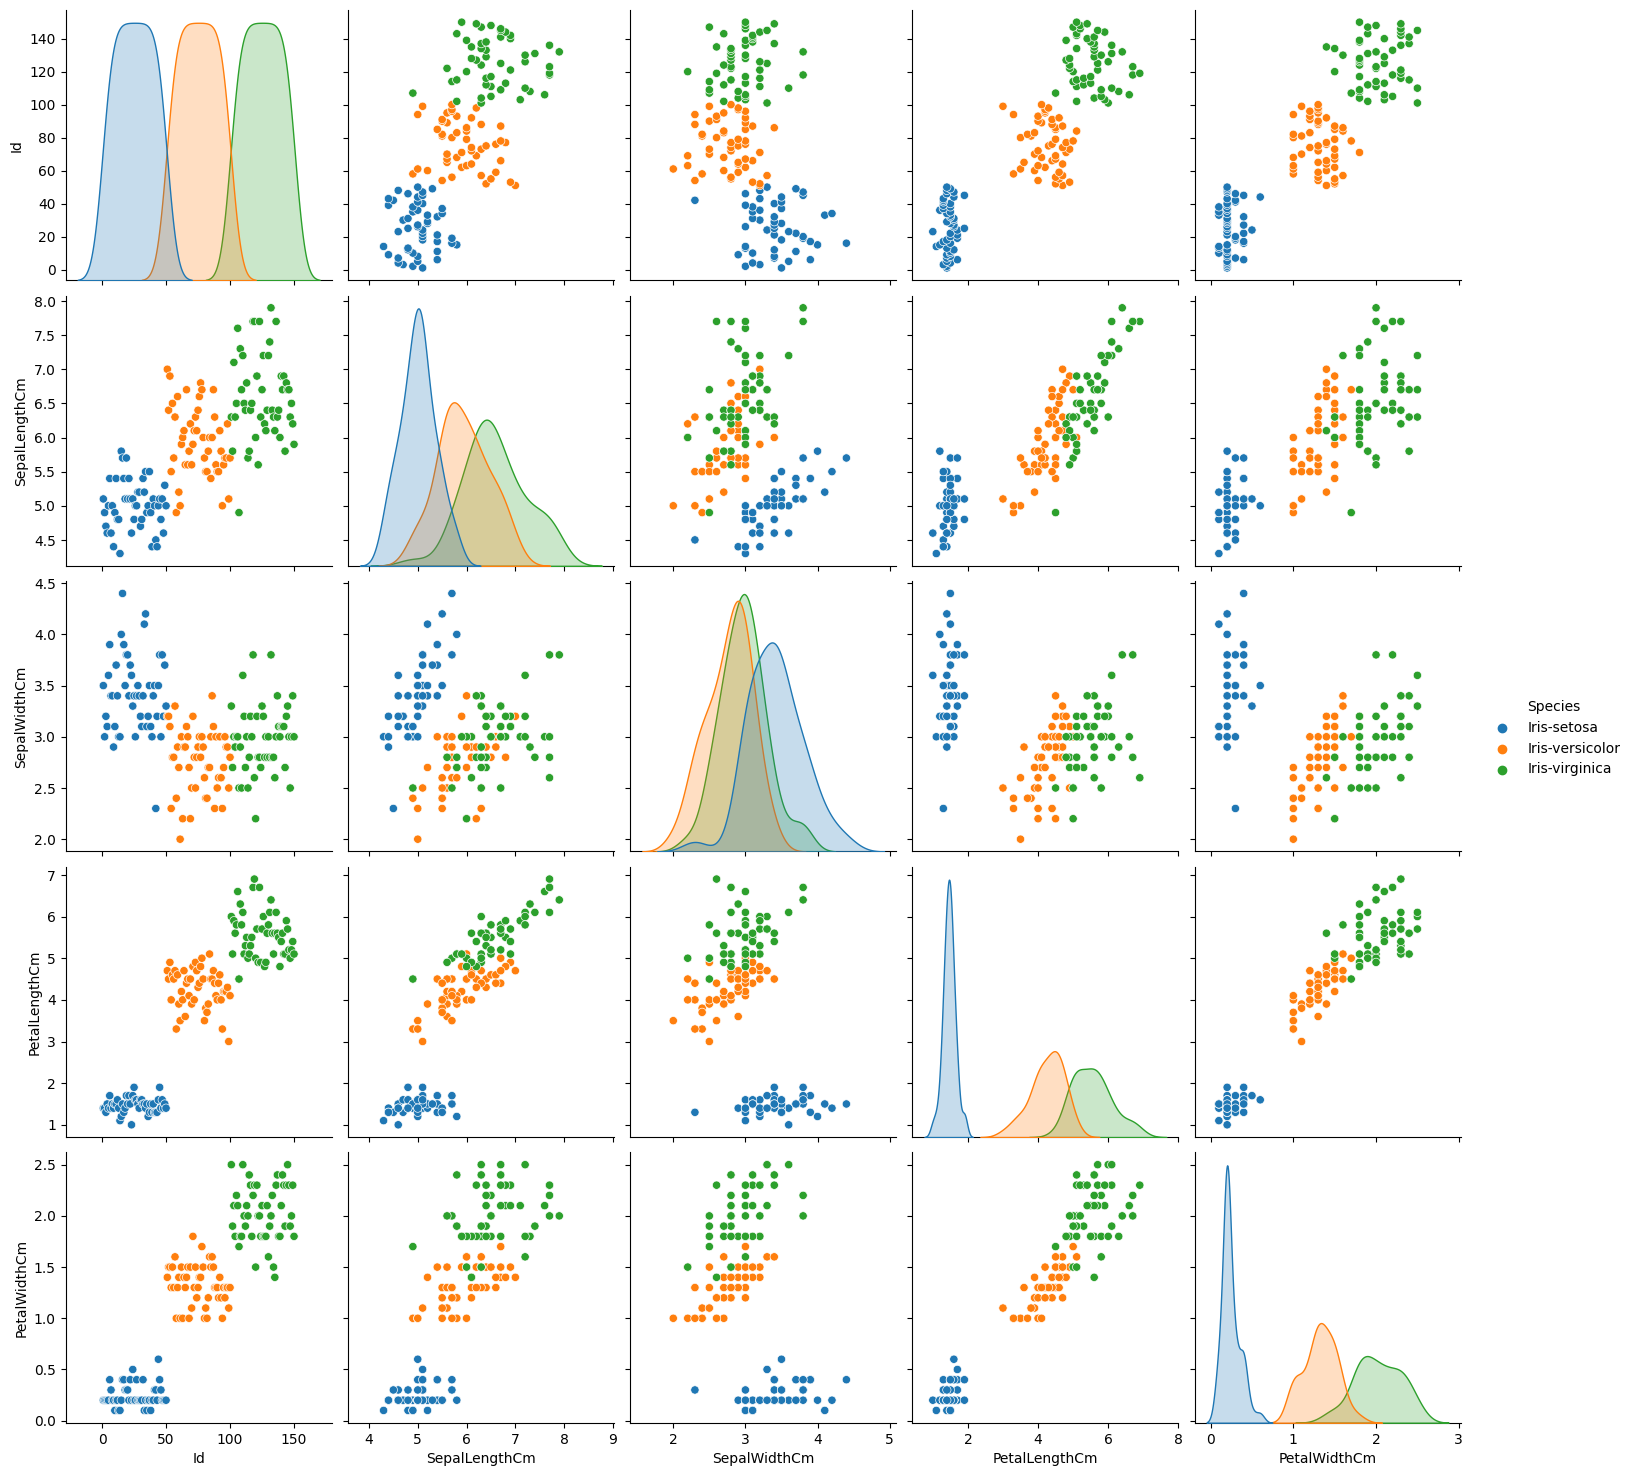

In [10]:
#Pair Plot
sns.pairplot(iris_data, hue="Species",height = 3, aspect = 1 )
plt.show()

### Observation(s):
1. PetalLengthCm and PetalWidthCm are the most useful features to identify various flower types.
2. While Setosa can be easily identified (linearly seperable), Virnica and Versicolor have some overlap (not linearly seperable).
3. We can find "lines" and "if-else" conditions to build a simple model to classify the flower types.

## 3D Plot

In [11]:
import plotly.express as px
fig = px.scatter_3d(iris_data, x='SepalLengthCm', y='SepalWidthCm', z='PetalWidthCm', color='Species')
fig.show()

### Observation(s):

1. Using SepalLengthCm,SepalWidthCm,PetalWidthCm features, we can distinguish Setosa flowers from others.
2. 3D plot are very hard to visualise.It is not useful when the number of features are more.

## Density Plot and Histogram

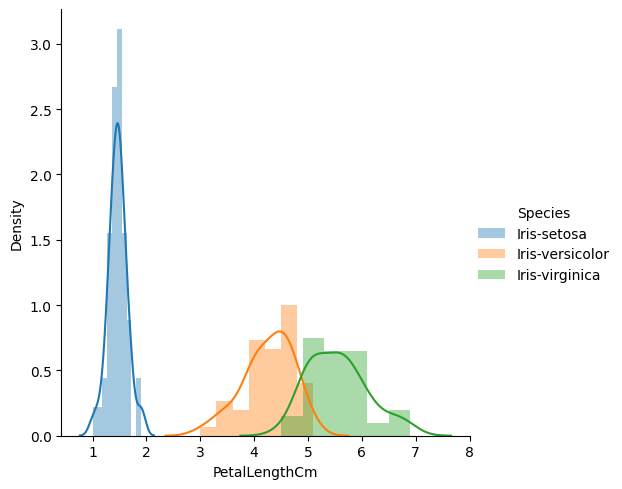

In [12]:
sns.FacetGrid(iris_data, hue ="Species", height= 5).map(sns.distplot, "PetalLengthCm").add_legend()
plt.show()

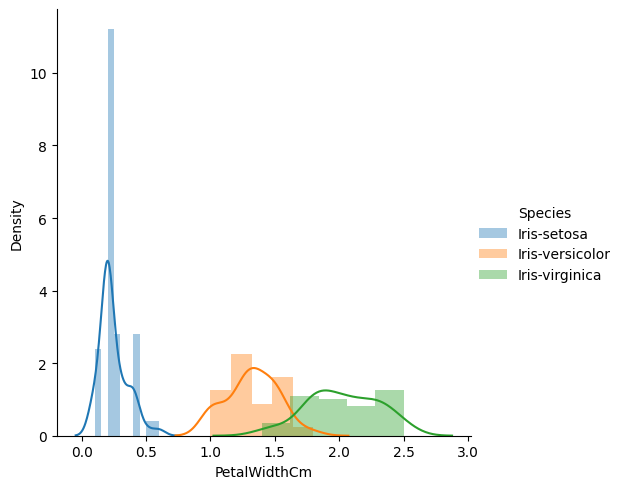

In [13]:
sns.FacetGrid(iris_data, hue ="Species", height= 5).map(sns.distplot, "PetalWidthCm").add_legend()
plt.show()

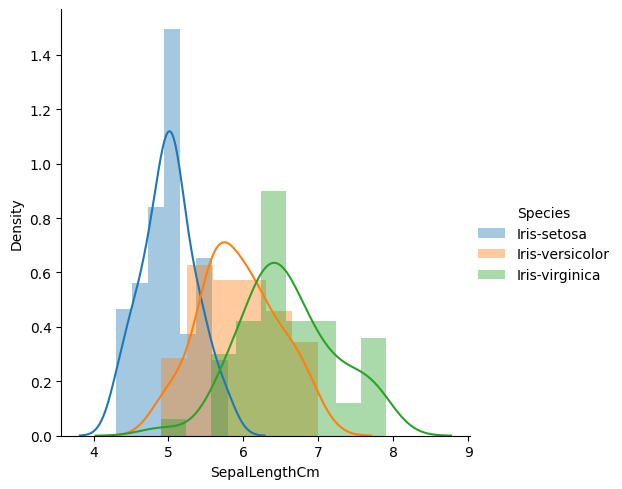

In [14]:
sns.FacetGrid(iris_data, hue ="Species", height= 5).map(sns.distplot, "SepalLengthCm").add_legend()
plt.show()

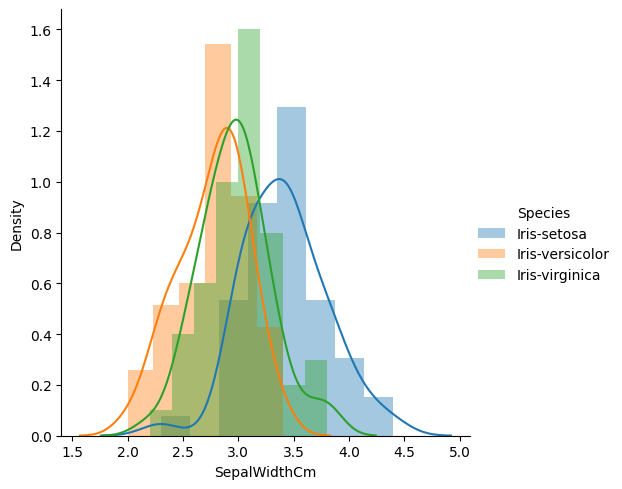

In [15]:
sns.FacetGrid(iris_data, hue ="Species", height= 5).map(sns.distplot, "SepalWidthCm").add_legend()
plt.show()

### Observation(s):

1. PetalLengthCm,PetalWidthCm are important features to distinguish Setosa flowers from others.
2. Flower whose PetalLengthCm is less than 2.3 cm are Setosa flower simillarly flower whose PetalWidthCm is less than 0.6 or 0.7 is Setosa flower.

## PDF(Probability Density Curve) and CDF (Cummulative Density Curve)

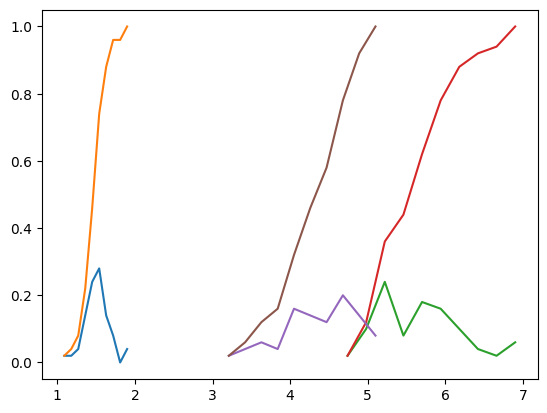

In [16]:
iris_setosa = iris_data.loc[iris_data["Species"] == "Iris-setosa"]
iris_virginica = iris_data.loc[iris_data["Species"] == "Iris-virginica"]
iris_versicolor = iris_data.loc[iris_data["Species"] == "Iris-versicolor"]


counts, bin_edges = np.histogram(iris_setosa['PetalLengthCm'], bins=10, density = True)
pdf = counts/(sum(counts))
#print(pdf);
#print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# virginica
counts, bin_edges = np.histogram(iris_virginica['PetalLengthCm'], bins=10, density = True)
pdf = counts/(sum(counts))
#print(pdf);
#print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


#versicolor
counts, bin_edges = np.histogram(iris_versicolor['PetalLengthCm'], bins=10, density = True)
pdf = counts/(sum(counts))
#print(pdf);
#print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.show()

### Observation

1. all setosa flower have petal length less than 2
2. 95% virginica flower has petal length greater than 3 and less than 5
3. 80 % versicolor flower has petal length greater than 5 and less than 7

## Box Plot

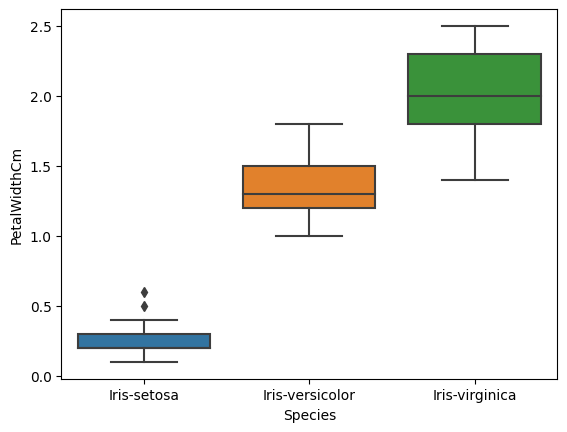

In [17]:
sns.boxplot(x='Species',y='PetalWidthCm', data=iris_data)
plt.show()

### Observation

1. Setosa flower has some outlier
2. virginica and versicolor flower does not have any outlier.

### Violin Plot

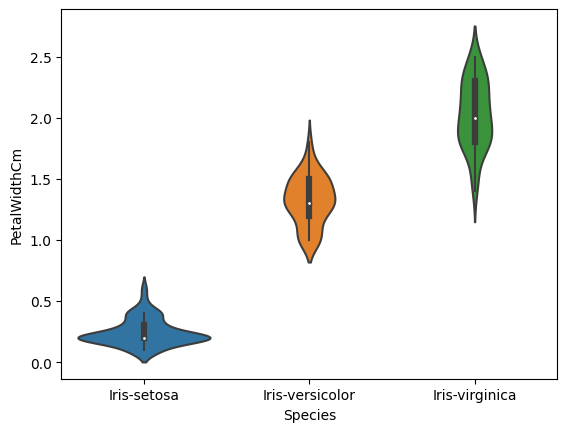

In [18]:
sns.violinplot(x='Species',y='PetalWidthCm', data=iris_data)
plt.show()

### Mean and Standard Deviation

In [19]:
print("Means:")
print(np.mean(iris_setosa["PetalLengthCm"]))
print(np.mean(iris_virginica["PetalLengthCm"]))
print(np.mean(iris_versicolor["PetalLengthCm"]))
print(np.mean(iris_data["PetalLengthCm"]))

print("\nStd-dev:");
print(np.std(iris_setosa["PetalLengthCm"]))
print(np.std(iris_virginica["PetalLengthCm"]))
print(np.std(iris_versicolor["PetalLengthCm"]))
print(np.std(iris_data["PetalLengthCm"]))

Means:
1.464
5.5520000000000005
4.26
3.758666666666666

Std-dev:
0.17176728442867112
0.546347874526844
0.4651881339845203
1.7585291834055212


### Median, Quantiles, Percentiles, IQR

In [20]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(iris_setosa["PetalLengthCm"]))
print(np.median(iris_virginica["PetalLengthCm"]))
print(np.median(iris_versicolor["PetalLengthCm"]))


print("\nQuantiles:")
print(np.percentile(iris_setosa["PetalLengthCm"],np.arange(0, 100, 25)))
print(np.percentile(iris_virginica["PetalLengthCm"],np.arange(0, 100, 25)))
print(np.percentile(iris_versicolor["PetalLengthCm"], np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(iris_setosa["PetalLengthCm"],90))
print(np.percentile(iris_virginica["PetalLengthCm"],90))
print(np.percentile(iris_versicolor["PetalLengthCm"], 90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(iris_setosa["PetalLengthCm"]))
print(robust.mad(iris_virginica["PetalLengthCm"]))
print(robust.mad(iris_versicolor["PetalLengthCm"]))


Medians:
1.5
5.55
4.35

Quantiles:
[1.    1.4   1.5   1.575]
[4.5   5.1   5.55  5.875]
[3.   4.   4.35 4.6 ]

90th Percentiles:
1.7
6.31
4.8

Median Absolute Deviation
0.14826022185056031
0.6671709983275211
0.5189107764769602


### Conclusion:
Key insights include:

* Species 'setosa' tends to have smaller sepal lengths but higher sepal widths compared to other species.
* There is a strong positive correlation between petal length and petal width.

This EDA provides valuable insights into the Iris dataset and lays the foundation for further analysis and modeling.